# Ejemplo de Red Neuronal con Keras usando sigmoid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
iris=load_iris()

sepal_length=np.array(iris.data[0:99,0])
petal_length=np.array(iris.data[0:99,2])
flower_type=np.array(iris.target[0:99])

x=np.column_stack((sepal_length,petal_length))

scaler = StandardScaler()
scaler.fit(x)

x=scaler.transform(x)
y=flower_type

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Text(0, 0.5, 'Petal Length')

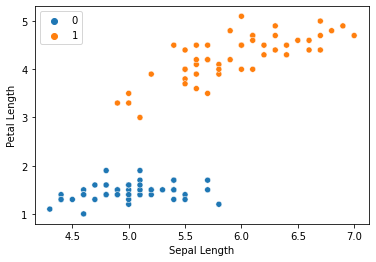

In [3]:
sns.scatterplot(x=sepal_length, y=petal_length, hue=flower_type)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Length')

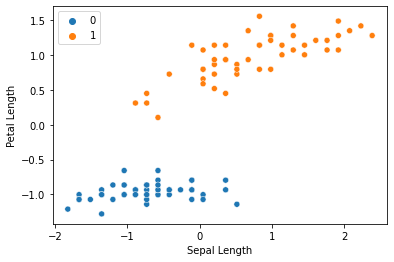

In [4]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=flower_type)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

In [5]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(1,activation="sigmoid", input_shape=(2,)))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.03),loss='mean_squared_error')
history=model.fit(x=x_train,y=y_train,epochs=400, validation_data=(x_test,y_test),verbose=0)

(0.0, 0.1)

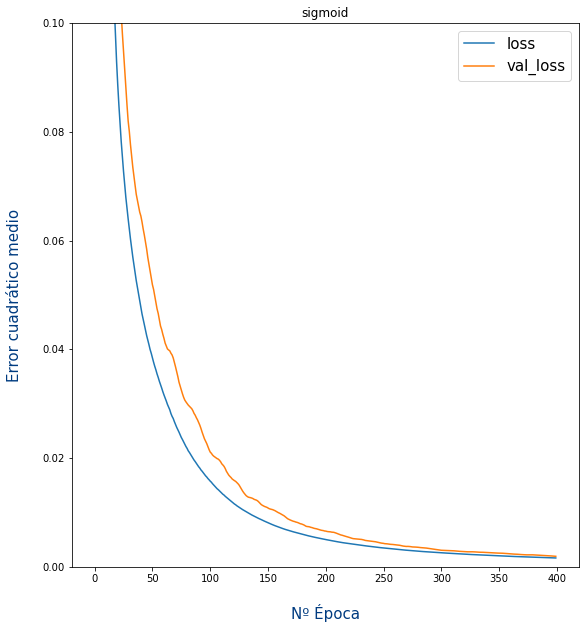

In [35]:
figure=plt.figure(figsize=(20, 10))
loss_axis = figure.add_subplot(121)



loss_axis.plot(history.history['loss'],label="loss")
loss_axis.plot(history.history['val_loss'],label="val_loss")

loss_axis.legend(fontsize=15,facecolor='#FFFFFF')
loss_axis.set_xlabel('Nº Época', fontsize=15,labelpad=20,color="#003B80") 
loss_axis.set_ylabel('Error cuadrático medio', fontsize=15,labelpad=20,color="#003B80")
loss_axis.set_title("sigmoid")
loss_axis.set_ylim(ymin=0,ymax=0.1)

In [36]:
w0 = model.layers[0].get_weights()[0][0][0]
w1 = model.layers[0].get_weights()[0][1][0]
b = model.layers[0].get_weights()[1][0]

print(f'y={w0}*sepal_length+{w1}*petal_length+({b})')

y=0.5450136065483093*sepal_length+4.443990230560303*petal_length+(1.1921249628067017)


In [47]:
x = np.linspace(-2, 2.5, 40)
y = np.linspace(-1.5, 2, 40)
x, y = np.meshgrid(x, y)
z = (x*w0)+(y*w1)+b
act=1/(1+np.exp(-z))


figure = plt.figure(figsize=(15, 8))
axis = figure.add_subplot(projection='3d')

axis.set_zlim(0, 1)
surface=axis.plot_surface(x, y, act, cmap='coolwarm')
axis.set_xlabel('Sepal Length')
axis.set_ylabel('Petal Length')
plt.show()

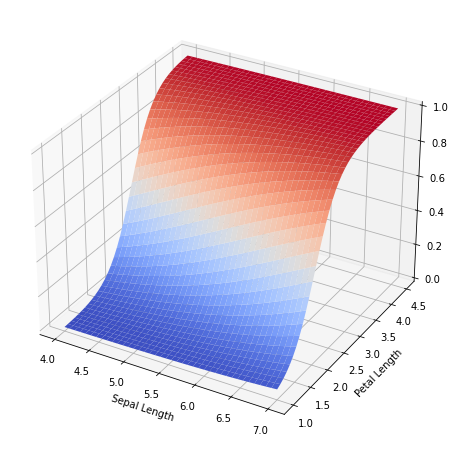

In [42]:
x = np.linspace(4, 7, 40)
y = np.linspace(1,4.5, 40)

scaled_data=scaler.transform(np.column_stack((x,y)))

x, y = np.meshgrid(x, y)

x_scaled,y_scaled=np.meshgrid(scaled_data[:,0], scaled_data[:,1])

z = (x_scaled*w0)+(y_scaled*w1)+b
act=1/(1+np.exp(-z))


figure = plt.figure(figsize=(15, 8))
axis = figure.add_subplot(projection='3d')

axis.set_zlim(0, 1)
surface=axis.plot_surface(x, y, act, cmap='coolwarm')
axis.set_xlabel('Sepal Length')
axis.set_ylabel('Petal Length')
plt.show()